# Exploration 7. Camera Sticker App
---
# (프로젝트) 고양이 수염 스티커 만들기

## [루브릭]


In [559]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

print(cv2.__version__)
print(dlib.__version__)

4.6.0
19.24.0


## Step 1. 스티커 구하기 or 만들기

In [560]:
img_cat_path = '/Users/joowanha/PycharmProjects/AIFFEL/camera_sticker/cat-whiskers.png'
my_image_path = '/Users/joowanha/PycharmProjects/AIFFEL/camera_sticker/selfie.jpg'

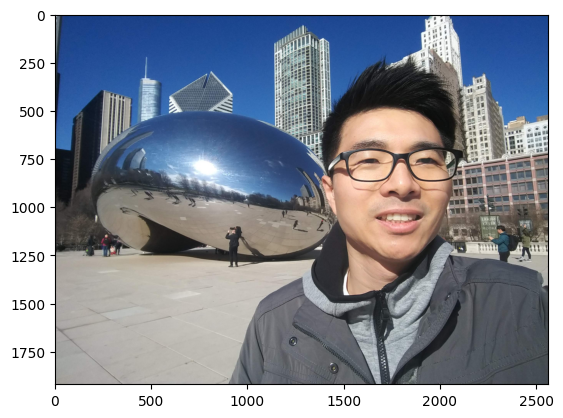

In [585]:
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_bgr.copy()
img_bgr_whisker = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

## Step 2. 얼굴 검출 & 랜드마크 검출 하기

오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.



In [586]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_show, 1)

In [587]:
type(dlib_rects)

_dlib_pybind11.rectangles

In [588]:
print(dlib_rects)

rectangles[[(1463, 576) (2129, 1242)], [(1967, 163) (2029, 225)]]


In [589]:
 for dlib_rect in dlib_rects:
    print(dlib_rect.left(), dlib_rect.top(), dlib_rect.right(), dlib_rect.bottom())

1463 576 2129 1242
1967 163 2029 225


얼굴이 아닌 오른쪽 상단 건물 부분이 잘 못 detection되어 해당 부위는 bounding box에서 제외하도록 하겠습니다.

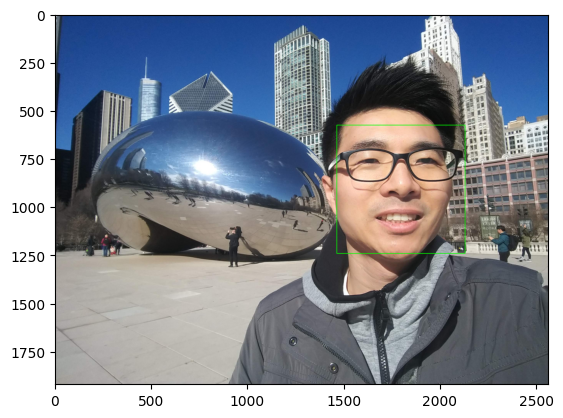

In [590]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    break
plt.imshow(img_show)
plt.show()

In [591]:
model_path = '/Users/joowanha/PycharmProjects/AIFFEL/camera_sticker/model/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [592]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_show, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    break
    
print(len(list_landmarks[0]))

68


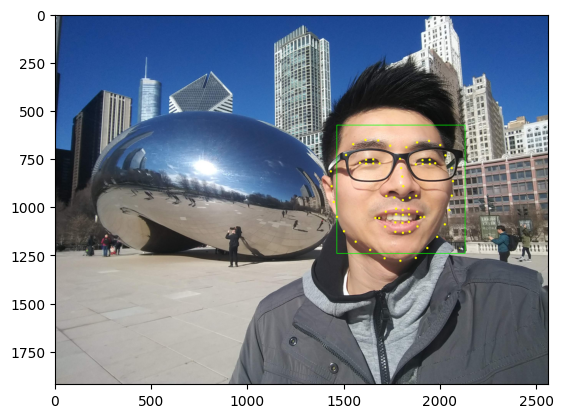

In [593]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 6, (255,255,0), -1)
plt.imshow(img_show)
plt.show()

## Step 3. 스티커 적용 위치 확인하기

고양이 수염이 적용될 위치를 landmark를 사용해서 계산해 보도록 하겠습니다.

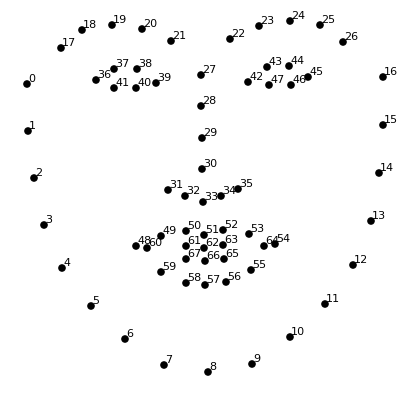


In [594]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33])
    x_33 = landmark[33][0] 
    y_33 = landmark[33][1]
    y_51 = landmark[51][1] 
    y_target = y_33 + (y_51-y_33)//2
    w = h = dlib_rect.width() 
    print (f'(x_33, y_33, y_51, y_target) : ({x_33}, {y_33}, {y_51}, {y_target})')
    print (f'(w,h) : ({w}, {h})')

(1806, 965)
(x_33, y_33, y_51, y_target) : (1806, 965, 1017, 991)
(w,h) : (667, 667)


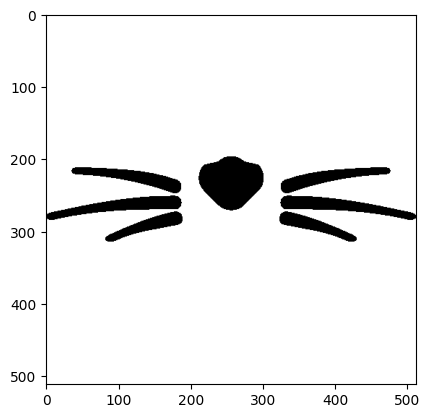

In [595]:
img_sticker = cv2.imread(img_cat_path)
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(img_sticker)
plt.show()

In [596]:
img_sticker.shape

(512, 512, 3)

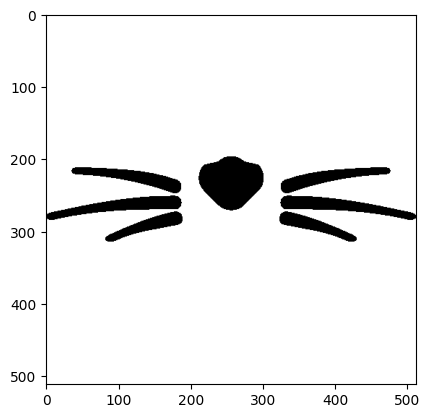

In [841]:
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(img_sticker)
plt.show()

In [599]:
# 스티커 부착 위치 계산
x_st = x_33 - img_sticker.shape[0]//2
y_st = y_33 - img_sticker.shape[1]//2
print(f'x_st, y_st : {x_st}, {y_st}')

x_st, y_st : 1550, 709


In [600]:
len(img_sticker[0])

512

In [601]:
img_sticker

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [602]:
img_sticker.shape

(512, 512, 3)

## Step 4. 스티커 적용하기

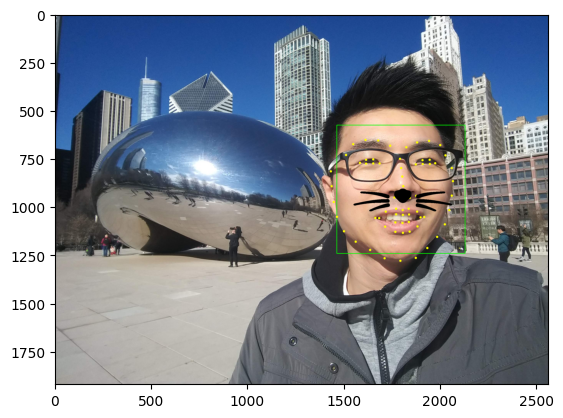

In [603]:
sticker_area = img_show[y_st:y_st+img_sticker.shape[0], x_st:x_st+img_sticker.shape[1]]
img_show[y_st:y_st+img_sticker.shape[0], x_st:x_st+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(img_show)
plt.show()

In [604]:
sticker_area = img_bgr[y_st:y_st+img_sticker.shape[0], x_st:x_st+img_sticker.shape[1]]
img_bgr_whisker[y_st:y_st+img_sticker.shape[0], x_st:x_st+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(img_bgr_whisker)
plt.show()

cv2.addWeighted() 명령어를 사용하여 스티커를 좀 더 자연스럽게 만들어 보도록 하겠습니다. (sticker 자체 이미지의 투명도를 변경하여 적용하는 방법도 가능할 것으로 판단됩니다.)

In [618]:
# sticker_area = img_bgr[y_st:y_st+img_sticker.shape[0], x_st:x_st+img_sticker.shape[1]]
# plt.imshow(sticker_area)
# plt.show()

In [619]:
# plt.imshow(img_sticker)
# plt.show()

In [615]:
sticker_weighted=cv2.addWeighted(sticker_area, 0.2, img_sticker, 0.8, 0)

In [616]:
plt.imshow(sticker_weighted)
plt.show()

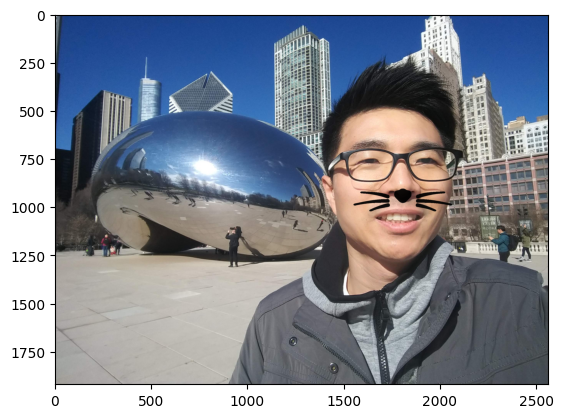

In [617]:
img_bgr[y_st:y_st+img_sticker.shape[0], x_st:x_st+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,sticker_weighted).astype(np.uint8)
plt.imshow(img_bgr)
plt.show()

## Step 5. 문제점 찾아보기

추가로 얼굴이 2개가 포함되어 있는 다른 이미지를 추가하여 스티커 부착을 해보는 작업을 해보도록 하겠습니다. 

In [912]:
image_twin_path = '/Users/joowanha/PycharmProjects/AIFFEL/camera_sticker/twins_2.png'

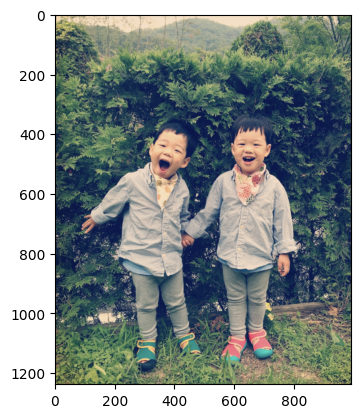

In [913]:
img_bgr_twin = cv2.imread(image_twin_path)
img_bgr_twin = cv2.cvtColor(img_bgr_twin, cv2.COLOR_BGR2RGB)
img_show_twin = img_bgr_twin.copy()
img_twin_whisker = img_bgr_twin.copy()
plt.imshow(img_bgr_twin)
plt.show()

In [914]:
img_bgr_twin.shape

(1238, 992, 3)

In [915]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_bgr_twin, 1)

In [916]:
for dlib_rect in dlib_rects:
    print(dlib_rect.left(), dlib_rect.top(), dlib_rect.right(), dlib_rect.bottom())

593 402 700 510
311 411 440 540


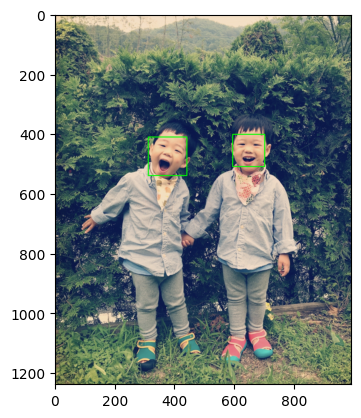

In [917]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_show_twin, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
plt.imshow(img_show_twin)
plt.show()

In [918]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_show_twin, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print(len(list_landmarks[1]))

68


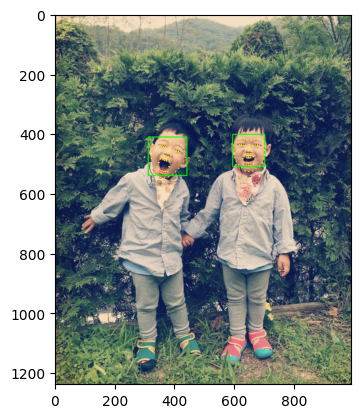

In [919]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show_twin, point, 2, (255,255,0), -1)
plt.imshow(img_show_twin)
plt.show()

In [920]:
target_list = []
i = 1
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    target_list.append(landmark[33])
    print (f"{i}_landmark 33 : ", landmark[33])   
    i += 1

1_landmark 33 :  (646, 467)
2_landmark 33 :  (371, 475)


In [921]:
target_list

[(646, 467), (371, 475)]

이미지 사이즈에 비례하여 수염의 크기를 조정하는 것이 좋을 것 같습니다.   
왼쪽 얼굴에 대한 얼굴 사이즈와 오른쪽 얼굴사이즈가 각각 다르기 때문에 수염의 크기는 얼굴 사각 박스의 0.8 * (가로) 길이에 맞춰 수염의 크기를 조정하는 것이 바람직 할 것 같습니다.

In [922]:
dlib_rects

rectangles[[(593, 402) (700, 510)], [(311, 411) (440, 540)]]

In [923]:
dlib_rects[0].right()

700

In [924]:
dlib_rects[0].left()

593

In [925]:
0.8*(dlib_rects[0].right()-dlib_rects[0].left())

85.60000000000001

In [926]:
img_sticker_1 = cv2.resize(img_sticker, (int(0.8*(dlib_rects[0].right()-dlib_rects[0].left())) , int(0.8*(dlib_rects[0].right()-dlib_rects[0].left()))))

In [927]:
img_sticker_1.shape

(85, 85, 3)

In [928]:
img_sticker_2 = cv2.resize(img_sticker, (int(0.8*(dlib_rects[1].right()-dlib_rects[1].left())) , int(0.8*(dlib_rects[1].right()-dlib_rects[1].left()))))

In [929]:
img_sticker_2.shape

(103, 103, 3)

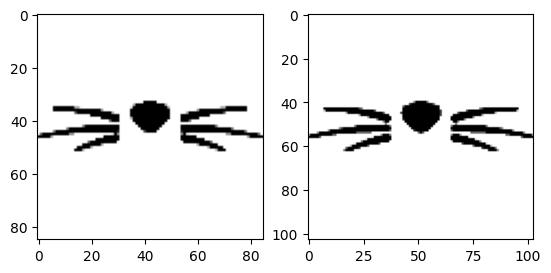

In [930]:
plt.subplot(1,2,1)
plt.imshow(img_sticker_1)
plt.subplot(1,2,2)
plt.imshow(img_sticker_2)
plt.show()

In [931]:
# 스티커 부착 위치 계산
x1_st = target_list[0][0] - img_sticker_1.shape[0]//2
y1_st = target_list[0][1] - img_sticker_1.shape[1]//2

x2_st = target_list[1][0] - img_sticker_2.shape[0]//2
y2_st = target_list[1][1] - img_sticker_2.shape[1]//2
print(f'x1_st, y1_st : {x1_st}, {y1_st}')
print(f'x2_st, y2_st : {x2_st}, {y2_st}')

x1_st, y1_st : 604, 425
x2_st, y2_st : 320, 424


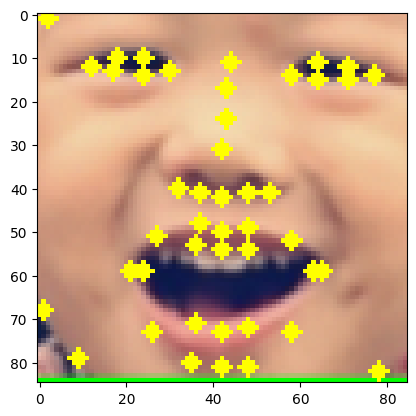

In [932]:
#스티커 적용위치 추출
sticker_area_1 = img_show_twin[y1_st:y1_st+img_sticker_1.shape[0], x1_st:x1_st+img_sticker_1.shape[1]]
sticker_area_2 = img_show_twin[y2_st:y2_st+img_sticker_2.shape[0], x2_st:x2_st+img_sticker_2.shape[1]]
plt.imshow(sticker_area_1)
plt.show()

In [933]:
sticker_area_2 = img_show_twin[y2_st:y2_st+img_sticker_2.shape[0], x2_st:x2_st+img_sticker_2.shape[1]]
plt.imshow(sticker_area_2)
plt.show()

In [934]:
#스티커 적용하기
sticker_area_1 = img_show_twin[y1_st:y1_st+img_sticker_1.shape[0], x1_st:x1_st+img_sticker_1.shape[1]]
sticker_area_2 = img_show_twin[y2_st:y2_st+img_sticker_2.shape[0], x2_st:x2_st+img_sticker_2.shape[1]]
sticker_area_1wh = np.where(img_sticker_1==255,sticker_area_1,img_sticker_1).astype(np.uint8)
sticker_area_2wh = np.where(img_sticker_2==255,sticker_area_2,img_sticker_2).astype(np.uint8)
plt.subplot(1,2,1)
plt.imshow(sticker_area_1wh)
plt.subplot(1,2,2)
plt.imshow(sticker_area_2wh)
plt.show()

얼굴이 기울어진 만큼 콧수염이 붙어 있는 각도도 기울이는 것이 바람직할 것 같습니다.  
얼굴이 기울어진 각도는 landmark에서 27번과 30번을 직선으로 이었을 때 수직면과 기울어진 각도를 통해 계산하도록 하겠습니다.  
[참고]   $  \tan\theta = \frac{x_{30} - x_{27}}{y_{30} - y_{27}}  $

In [935]:
import math

In [936]:
tan_theta_1 = (list_landmarks[0][30][0]-list_landmarks[0][27][0])/(list_landmarks[0][30][1]-list_landmarks[0][27][1])
tan_theta_2 = (list_landmarks[1][30][0]-list_landmarks[1][27][0])/(list_landmarks[1][30][1]-list_landmarks[1][27][1])
theta_1 = np.arctan(tan_theta_1)
theta_2 = np.arctan(tan_theta_2)
rotate_angle_1 = theta_1 *180/math.pi
rotate_angle_2 = theta_2 *180/math.pi
print(rotate_angle_1, rotate_angle_2)

-5.710593137499643 -27.89727103094763


In [937]:
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR, borderValue=(255,255,255))
    return result

In [938]:
img_rot_1 = rotate_image(img_sticker_1,rotate_angle_1)
img_rot_2 = rotate_image(img_sticker_2,rotate_angle_2)
plt.subplot(1,2,1)
plt.imshow(img_rot_1)
plt.subplot(1,2,2)
plt.imshow(img_rot_2)
plt.show()

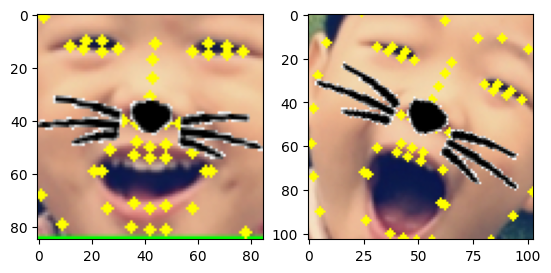

In [939]:
#스티커 적용하기
sticker_area_1 = img_show_twin[y1_st:y1_st+img_rot_1.shape[0], x1_st:x1_st+img_rot_1.shape[1]]
sticker_area_2 = img_show_twin[y2_st:y2_st+img_rot_2.shape[0], x2_st:x2_st+img_rot_2.shape[1]]
sticker_area_1wh = np.where(img_rot_1==255,sticker_area_1,img_rot_1).astype(np.uint8)
sticker_area_2wh = np.where(img_rot_2==255,sticker_area_2,img_rot_2).astype(np.uint8)
plt.subplot(1,2,1)
plt.imshow(sticker_area_1wh)
plt.subplot(1,2,2)
plt.imshow(sticker_area_2wh)
plt.show()

그런데 수염을 회전하고 합셩을 했더니 수염 주변으로 흰색 경계가 나타났습니다. 동일한 로직으로 회전만 시키고 합성한 것인데 흰색 경계가 왜 나타났는지는 추후 별도로 확인해 봐야겠습니다.   
일단은 흰색 부분의 영향을 줄이기 위해 합성시 색상 기준을 좀 더 넓게 적용하도록 하겠습니다.

In [940]:
sticker_area_1 = img_bgr_twin[y1_st:y1_st+img_rot_1.shape[0], x1_st:x1_st+img_rot_1.shape[1]]
sticker_area_2 = img_bgr_twin[y2_st:y2_st+img_rot_2.shape[0], x2_st:x2_st+img_rot_2.shape[1]]
img_twin_whisker[y1_st:y1_st+img_rot_1.shape[0], x1_st:x1_st+img_rot_1.shape[1]] = \
    np.where(img_rot_1 > 100,sticker_area_1,img_rot_1).astype(np.uint8)
img_twin_whisker[y2_st:y2_st+img_rot_2.shape[0], x2_st:x2_st+img_rot_2.shape[1]] = \
    np.where(img_rot_2 > 100,sticker_area_2,img_rot_2).astype(np.uint8)
plt.figure(figsize=(10, 10*img_twin_whisker.shape[0]/img_twin_whisker.shape[1]))
plt.imshow(img_twin_whisker)
plt.show()

[회고]  
 - 이미지 회전을 통해 수염의 이미지 외곽이 일부 변형된 것을 확인할 수 있었습니다. 회전을 하더라도 원래 이미지를 그대로 유지할 것으로 예상하였는데 픽셀의 크기에 따라 영향이 있음을 확인할 수 있었습니다.  
   그렇지만 여전히 흰색의 경계선이 왜 나타난 것인지는 아직 명확히 확인되지 않았습니다. 추가 스터디를 통해 해당 사유에 대해 좀 더 확인해 보도록 하겠습니다. 

[참고자료] 
 - 고양이 수염 회전 : https://velog.io/@dldndyd01/OpenCV-%EC%9D%B4%EB%AF%B8%EC%A7%80-%ED%9A%8C%EC%A0%84%EC%A4%91%EC%95%99-%EA%B8%B0%EC%A4%80-%ED%9A%8C%EC%A0%84-cv2.getRotationMatrix2D-%EC%96%BC%EA%B5%B4-%ED%9A%8C%EC%A0%84-%EA%B0%81%EB%8F%84-%EA%B5%AC%ED%95%98%EA%B8%B0  
 - 2D rotation : https://deep-learning-study.tistory.com/199
 - affine 행렬 : https://m.blog.naver.com/baejun_k/221207284223